# Coursework #1

## Introduction

This coursework is concerned with building multi-layer networks to address the MNIST digit classification problem. It builds on the previous labs, in particular [02_MNIST_SLN.ipynb](02_MNIST_SLN.ipynb) in which single layer networks were trained for MNIST digit classification.   The course will involve extending that code to use Sigmoid and Softmax layers, combining these into multi-layer networks, and carrying out a number of MNIST digit classification experiments, to investigate the effect of learning rate, the number of hidden units, and the number of hidden layers.

The coursework is divided into 4 tasks:
* **Task 1**:   *Implementing a sigmoid layer* - 15 marks.  
This task involves extending the `Linear` class in file `mlp/layers.py` to `Sigmoid`, with code for forward prop, backprop computation of the gradient, and weight update.
* **Task 2**:  *Implementing a softmax layer* - 15 marks.  
This task involves extending the `Linear` class in file `mlp/layers.py` to `Softmax`, with code for forward prop, backprop computation of the gradient, and weight update.
* **Task 3**:  *Constructing a multi-layer network* - 40 marks.  
This task involves putting together a Sigmoid and a Softmax layer to create a multi-layer network, with one hidden layer (100 units) and one output layer, that is trained to classify MNIST digits.  This task will include reporting classification results, exploring the effect of learning rates, and plotting Hinton Diagrams for the hidden units and output units.
* **Task 4**:  *Experiments with different architectures*  - 30 marks.  
This task involves further MNIST classification experiments, primarily looking at the effect of using different numbers of hidden layers.
The coursework will be marked out of 100, and will contribute 30% of the total mark in the MLP course.

## Previous Tutorials

Before starting this coursework make sure that you have completed the first three labs:

* [00_Introduction.ipynb](00_Introduction.ipynb) - setting up your environment; *Solutions*: [00_Introduction_solution.ipynb](00_Introduction_solution.ipynb)
* [01_Linear_Models.ipynb](01_Linear_Models.ipynb) - training single layer networks; *Solutions*: [01_Linear_Models_solution.ipynb](01_Linear_Models_solution.ipynb)
* [02_MNIST_SLN.ipynb](02_MNIST_SLN.ipynb) - training a single layer network for MNIST digit classification

To ensure that your virtual environment is correct, please see [this note](https://github.com/CSTR-Edinburgh/mlpractical/blob/master/kernel_issue_fix.md) on the GitHub.
## Submission
**Submission Deadline:  Thursday 29 October, 16:00** 

Submit the coursework as an ipython notebook file, using the `submit` command in the terminal on a DICE machine. If your file is `03_MLP_Coursework1.ipynb` then you would enter:

`submit mlp 1 03_MLP_Coursework1.ipynb` 

where `mlp 1` indicates this is the first coursework of MLP.

After submitting, you should receive an email of acknowledgment from the system confirming that your submission has been received successfully. Keep the email as evidence of your coursework submission.

**Please make sure you submit a single `ipynb` file (and nothing else)!**

**Submission Deadline:  Thursday 29 October, 16:00** 



## Getting Started
Please enter your exam number and the date in the next code cell.

In [ ]:
#MLP Coursework 1
#Exam number: B035680
#Date: 19.10.2015



Please run the next code cell, which imports `numpy` and seeds the random number generator.  Please **do not** modify the random number generator seed!

In [1]:
import numpy

#Seed a random number generator running the below cell, but do **not** modify the seed.
rng = numpy.random.RandomState([2015,10,10])
rng_state = rng.get_state()

## Task 1 - Sigmoid Layer (15%)

In this task you need to create a class `Sigmoid` which encapsulates a layer of sigmoid units.  You should do this by extending the `mlp.layers.Linear` class (in file `mlp/layers.py`), which implements a a layer of linear units (i.e. weighted sum plus bias).  The `Sigmoid` class extends this by applying the sigmoid transfer function to the weighted sum in the forward propagation, and applying the derivative of the sigmoid in the gradient descent back propagation and computing the gradients with respect to layer's parameters. Do **not** copy the implementation provided in `Linear` class but rather, **reuse** it through inheritance.

When you have implemented `Sigmoid` (in the `mlp.layers` module), then please test it by running the below code cell.


In [4]:
from mlp.layers import Sigmoid

a = numpy.asarray([-20.1, 52.4, 0, 0.05, 0.05, 49])
b = numpy.asarray([-20.1, 52.4, 0, 0.05, 0.05, 49, 20, 20])

rng.set_state(rng_state)
sigm = Sigmoid(idim=a.shape[0], odim=b.shape[0], rng=rng)

fp = sigm.fprop(a)
deltas, ograds  = sigm.bprop(h=fp, igrads=b)

print fp.sum()
print deltas.sum()
print ograds.sum()
%precision 3
print fp
print deltas
print ograds


4.21941537867
25.9255147706
4.1105500626
[ 0.067  0.728  0.999  0.512  0.159  0.584  0.238  0.932]
[ -1.263e+00   1.037e+01   0.000e+00   1.249e-02   6.678e-03   1.191e+01
   3.628e+00   1.268e+00]
[ 1.406  0.078 -0.268  0.418  1.646  0.831]


***
To include the `Sigmoid` code in the notebook please run the below code cell.  (The `%load` notebook command is used to load the source of the `Sigmoid` class from `mlp/layers.py`.)

In [ ]:
# %load -s Sigmoid mlp/layers.py
class Sigmoid(Linear):

    def sigmoid(self, number):
        """
        :param number: number to be put through sigmoid function
        :return: number ran through sigmoid function
        """
        the_sigmoid = 1.0 / (1 + numpy.exp(-number))
        return the_sigmoid

    def sigmoid_derivative(self, number):
        """
        :param number: number to be put through sigmoid derivative function
        :return: number ran through sigmoid function
        """
        the_sigmoid_derivative = self.sigmoid(number) * (1 - self.sigmoid(number))
        return the_sigmoid_derivative

    def fprop(self, inputs):
        """
        Implements a forward propagation through the i-th layer, that is
        some form of:
           a^i = xW^i + b^i
           h^i = f^i(a^i)
        with f^i, W^i, b^i denoting a non-linearity, weight matrix and
        biases of this (i-th) layer, respectively and x denoting inputs.

        :param inputs: matrix of features (x) or the output of the previous layer h^{i-1}
        :return: h^i, matrix of transformed by layer features
        """
        a = numpy.dot(inputs, self.W) + self.b
        # here f() is an identity function, so just return a linear transformation

        for i in range(0, len(a)):
            for j in range(0, len(a[i])):
                a[i][j] = self.sigmoid(a[i][j])

        return a

    def bprop(self, h, igrads):
        """
        Implements a backward propagation through the layer, that is, given
        h^i denotes the output of the layer and x^i the input, we compute:
        dh^i/dx^i which by chain rule is dh^i/da^i da^i/dx^i
        x^i could be either features (x) or the output of the lower layer h^{i-1}
        :param h: it's an activation produced in forward pass
        :param igrads, error signal (or gradient) flowing to the layer, note,
               this in general case does not corresponds to 'deltas' used to update
               the layer's parameters, to get deltas ones need to multiply it with
               the dh^i/da^i derivative
        :return: a tuple (deltas, ograds) where:
               deltas = igrads * dh^i/da^i
               ograds = deltas \times da^i/dx^i
        """

        # since df^i/da^i = 1 (f is assumed identity function),
        # deltas are in fact the same as igrads
        ograds = numpy.dot(igrads, self.W.T)
        return igrads, ograds

        
    def get_name(self):
        return 'sigmoid'


## Task 2 - Softmax (15%)

In this task you need to create a class `Softmax` which encapsulates a layer of softmax units.  As in the previous task, you should do this by extending the `mlp.layers.Linear` class (in file `mlp/layers.py`).

When you have implemented `Softmax` (in the `mlp.layers` module), then please test it by running the below code cell.


In [3]:
from mlp.layers import Softmax

a = numpy.asarray([-20.1, 52.4, 0, 0.05, 0.05, 49])
b = numpy.asarray([0, 0, 0, 0, 0, 0, 0, 1])

rng.set_state(rng_state)
softmax = Softmax(idim=a.shape[0], odim=b.shape[0], rng=rng)

fp = softmax.fprop(a)
deltas, ograds = softmax.bprop_cost(h=None, igrads=fp-b, cost=None)

print fp.sum()
print deltas.sum()
print ograds.sum()
%precision 3
print fp
print deltas
print ograds


1.0
0.0
0.0744177068753
[  4.571e-05   1.697e-03   9.877e-01   6.631e-04   1.194e-04   8.880e-04
   1.977e-04   8.671e-03]
[  4.571e-05   1.697e-03   9.877e-01   6.631e-04   1.194e-04   8.880e-04
   1.977e-04  -9.913e-01]
[-0.089  0.03   0.079  0.011  0.017  0.027]


***
To include the `Softmax` code in the notebook please run the below code cell.  (The notebook `%load` command is used to load the source of the `Softmax` class from `mlp/layers.py`.)

In [ ]:
%load -s Softmax mlp/layers.py

## Task 3 - Multi-layer network for MNIST classification (40%)

**(a)** (20%)  Building on the single layer linear network for MNIST classification used in lab [02_MNIST_SLN.ipynb](02_MNIST_SLN.ipynb), and using the `Sigmoid` and `Softmax` classes that you implemented in tasks 1 and 2, construct and learn a model that classifies MNIST images and:
   * Has one hidden layer with a sigmoid transfer function and 100 units
   * Uses a softmax output layer to discriminate between the 10 digit classes (use the `mlp.costs.CECost()` cost)

Your code should print the final values of the error function and the classification accuracy for train, validation, and test sets (please keep also the log information printed by default by the optimiser). Limit the number of training epochs to 30. You can, of course, split your code across as many cells as you think is necessary.

In [63]:
# include here the complete code that constructs the model, performs training,
# and prints the error and accuracy for train/valid/test

import numpy
import logging

logger = logging.getLogger()
logger.setLevel(logging.INFO)

from mlp.layers import MLP, Linear, Sigmoid, Softmax #import required layer types
from mlp.optimisers import SGDOptimiser #import the optimiser
from mlp.dataset import MNISTDataProvider #import data provider
from mlp.costs import MSECost, CECost #import the cost we want to use for optimisation
from mlp.schedulers import LearningRateFixed

# define the model structure, here just one linear layer
# and mean square error cost
cost = CECost()
model = MLP(cost=cost)
model.add_layer(Sigmoid(idim=784, odim=100, rng=rng))
model.add_layer(Softmax(idim=100, odim=10, rng=rng))
#one can stack more layers here

# define the optimiser, here stochasitc gradient descent
# with fixed learning rate and max_epochs as stopping criterion
lr_scheduler = LearningRateFixed(learning_rate=0.01, max_epochs=30)
optimiser = SGDOptimiser(lr_scheduler=lr_scheduler)

logger.info('Initialising data providers...')
train_dp = MNISTDataProvider(dset='train', batch_size=100, max_num_batches=-10, randomize=True)
valid_dp = MNISTDataProvider(dset='valid', batch_size=100, max_num_batches=-10, randomize=False)

logger.info('Training started...')
optimiser.train(model, train_dp, valid_dp)

logger.info('Testing the model on test set:')
test_dp = MNISTDataProvider(dset='eval', batch_size=100, max_num_batches=-10, randomize=False)
cost, accuracy = optimiser.validate(model, test_dp)
logger.info('MNIST test set accuracy is %.2f %% (cost is %.3f)'%(accuracy*100., cost))

INFO:root:Initialising data providers...
INFO:root:Training started...
INFO:mlp.optimisers:Epoch 0: Training cost (ce) for random model is 2.402. Accuracy is 9.02%
INFO:mlp.optimisers:Epoch 0: Validation cost (ce) for random model is 2.391. Accuracy is 9.17%
INFO:mlp.optimisers:Epoch 1: Training cost (ce) is 2.209. Accuracy is 36.56%
INFO:mlp.optimisers:Epoch 1: Validation cost (ce) is 2.091. Accuracy is 57.40%
INFO:mlp.optimisers:Epoch 1: Took 18 seconds. Training speed 3240 pps. Validation speed 4156 pps.
INFO:mlp.optimisers:Epoch 2: Training cost (ce) is 1.955. Accuracy is 62.49%
INFO:mlp.optimisers:Epoch 2: Validation cost (ce) is 1.785. Accuracy is 70.14%
INFO:mlp.optimisers:Epoch 2: Took 18 seconds. Training speed 3246 pps. Validation speed 4250 pps.
INFO:mlp.optimisers:Epoch 3: Training cost (ce) is 1.627. Accuracy is 69.57%
INFO:mlp.optimisers:Epoch 3: Validation cost (ce) is 1.439. Accuracy is 74.24%
INFO:mlp.optimisers:Epoch 3: Took 18 seconds. Training speed 3290 pps. Valida

**(b)** (10%) Investigate the impact of different learning rates $\eta \in \{0.5, 0.2, 0.1, 0.05, 0.01, 0.005\}$ on the convergence of the network training as well as the final accuracy:
   * Plot (on a single graph) the error rate curves for each learning rate as a function of training epochs for training set
   * Plot (on another single graph) the error rate curves as a function of training epochs for validation set
   * Include a table of the corresponding error rates for test set

The notebook command `%matplotlib inline` ensures that your graphs will be added to the notebook, rather than opened as additional windows.

Eta,Error Rates
0.5,0.0235
0.2,0.0325
0.1,0.0424
0.05,0.0587
0.01,0.0944
0.005,0.114


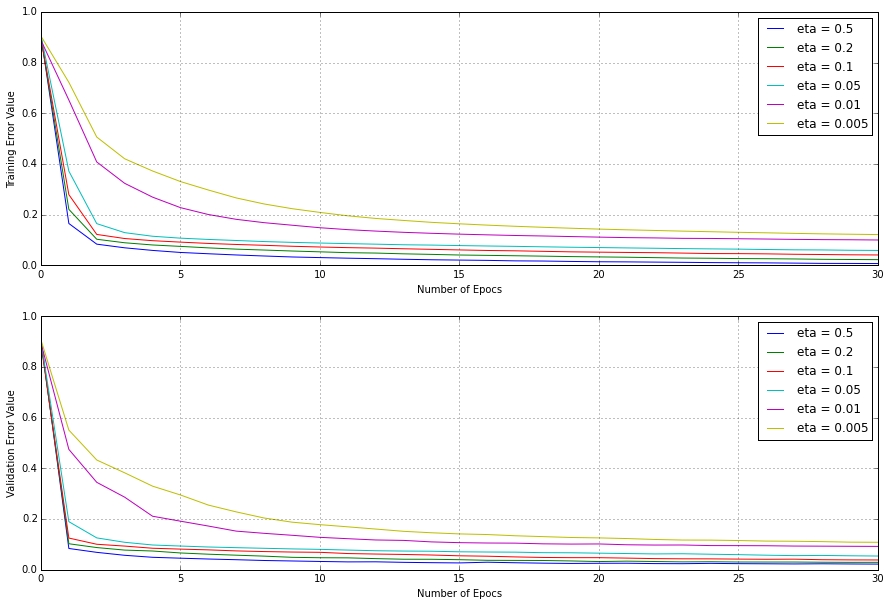

In [66]:
%matplotlib inline

# include here the complete code that constructs the model, performs training,
# and prints the error and accuracy for train/valid/test

import numpy
import logging
import matplotlib.pyplot as plt

logger = logging.getLogger()
logger.setLevel(logging.WARNING)

from mlp.layers import MLP, Linear, Sigmoid, Softmax #import required layer types
from mlp.optimisers import SGDOptimiser #import the optimiser
from mlp.dataset import MNISTDataProvider #import data provider
from mlp.costs import MSECost, CECost #import the cost we want to use for optimisation
from mlp.schedulers import LearningRateFixed

etas = [0.5, 0.2, 0.1, 0.05, 0.01, 0.005]
error_rates = []

plt.figure(figsize=(15, 10))

for eta in etas:
    # define the model structure, here just one linear layer
    # and mean square error cost
    cost = CECost()
    model = MLP(cost=cost)
    model.add_layer(Sigmoid(idim=784, odim=100, rng=rng))
    model.add_layer(Softmax(idim=100, odim=10, rng=rng))
    #one can stack more layers here

    # define the optimiser, here stochasitc gradient descent
    # with fixed learning rate and max_epochs as stopping criterion
    lr_scheduler = LearningRateFixed(learning_rate=eta, max_epochs=30)
    optimiser = SGDOptimiser(lr_scheduler=lr_scheduler)

    logger.warning('Initialising data providers...')
    train_dp = MNISTDataProvider(dset='train', batch_size=100, max_num_batches=-10, randomize=True)
    valid_dp = MNISTDataProvider(dset='valid', batch_size=100, max_num_batches=-10, randomize=False)

    logger.warning('Training started for eta {0}...'.format(eta))
    training_stats, validation_stats = optimiser.train(model, train_dp, valid_dp)
    
    logger.info('Testing the model on test set:')
    test_dp = MNISTDataProvider(dset='eval', batch_size=100, max_num_batches=-10, randomize=False)
    cost, accuracy = optimiser.validate(model, test_dp)
    logger.info('MNIST test set accuracy is %.2f %% (cost is %.3f)'%(accuracy*100., cost))

    error_rates.append(1-accuracy)
    
    plt.subplot(2,1,1)
    train_errors = []
    for training_stat in training_stats:
        train_errors.append(1 - training_stat[1])
    
    plt.plot(train_errors, label="eta = " + str(eta))
    
    plt.subplot(2,1,2)
    validation_errors = []
    for validation_stat in validation_stats:
        validation_errors.append(1 - validation_stat[1])

    plt.plot(validation_errors, label="eta = " + str(eta))
    
plt.subplot(2,1,1)
plt.xlabel("Number of Epocs")
plt.ylabel("Training Error Value")
plt.legend()
plt.grid()

plt.subplot(2,1,2)
plt.xlabel("Number of Epocs")
plt.ylabel("Validation Error Value")
plt.legend()
plt.grid()

plt.show

from IPython.core.display import HTML
text = "<br><table><tr><td><b>Eta</b></td><td><b>Error Rates</b></td></tr>"
for i in range(0, len(error_rates)):
    text = text + "<tr><td>"+ str(etas[i])+"</td><td>" + str(error_rates[i]) + "</td></tr>"
text = text + "</table>"
HTML(text)

**(c)** (10%) Plot the following graphs:
  * Display the 784-element weight vector of each of the 100 hidden units as 10x10 grid plot of 28x28 images, in order to visualise what features of the input they are encoding.  To do this, take the weight vector of each hidden unit, reshape to 28x28, and plot using the `imshow` function).
  * Plot a Hinton Diagram of the output layer weight matrix for digits 0 and 1

In [ ]:
%matplotlib inline

# include here the complete code that constructs the model, performs training,
# and prints the error and accuracy for train/valid/test

import numpy
import logging
import matplotlib.pyplot as plt

logger = logging.getLogger()
logger.setLevel(logging.WARNING)

from mlp.layers import MLP, Linear, Sigmoid, Softmax #import required layer types
from mlp.optimisers import SGDOptimiser #import the optimiser
from mlp.dataset import MNISTDataProvider #import data provider
from mlp.costs import MSECost, CECost #import the cost we want to use for optimisation
from mlp.schedulers import LearningRateFixed

# define the model structure, here just one linear layer
# and mean square error cost
cost = CECost()
model = MLP(cost=cost)
model.add_layer(Sigmoid(idim=784, odim=100, rng=rng))
model.add_layer(Softmax(idim=100, odim=10, rng=rng))
#one can stack more layers here

# define the optimiser, here stochasitc gradient descent
# with fixed learning rate and max_epochs as stopping criterion
lr_scheduler = LearningRateFixed(learning_rate=0.5, max_epochs=30)
optimiser = SGDOptimiser(lr_scheduler=lr_scheduler)

logger.warning('Initialising data providers...')
train_dp = MNISTDataProvider(dset='train', batch_size=100, max_num_batches=-10, randomize=True)
valid_dp = MNISTDataProvider(dset='valid', batch_size=100, max_num_batches=-10, randomize=False)

logger.warning('Training started...')
training_stats, validation_stats = optimiser.train(model, train_dp, valid_dp)

logger.warning('Testing the model on test set:')
test_dp = MNISTDataProvider(dset='eval', batch_size=100, max_num_batches=-10, randomize=False)
cost, accuracy = optimiser.validate(model, test_dp)
logger.info('MNIST test set accuracy is %.2f %% (cost is %.3f)'%(accuracy*100., cost))

figure, axis = plt.subplots(10,10, figsize=(15,15))
for i in range(0,10):
    for j in range(0,10):
        inputs = []
        for weight in model.layers[0].W:
            inputs.append(weight[i * 10 + j])
            
        inputs = numpy.array(inputs)
        axis[i,j].imshow(inputs.reshape(28,28))
plt.show()

figure, axis2 = plt.subplots(1,2, figsize=(10,10))

inputs = []
for i in [0, 1]:
    inputs = model.layers[1].W.T[i]
    hinton(inputs.reshape(10,10), max_weight=numpy.max(numpy.abs(inputs)), ax=axis2[i])
plt.show()


"""
hinton method taken from http://matplotlib.org/examples/specialty_plots/hinton_demo.html
"""
def hinton(matrix, max_weight=None, ax=None):
    """Draw Hinton diagram for visualizing a weight matrix."""
    ax = ax if ax is not None else plt.gca()

    if not max_weight:
        max_weight = 2**numpy.ceil(numpy.log(numpy.abs(matrix).max())/numpy.log(2))

    ax.patch.set_facecolor('gray')
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

    for (x,y),w in numpy.ndenumerate(matrix):
        color = 'white' if w > 0 else 'black'
        size = numpy.sqrt(numpy.abs(w))
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                             facecolor=color, edgecolor=color)
        ax.add_patch(rect)

    ax.autoscale_view()
    ax.invert_yaxis()
    

## Task 4 - Experiments with 1-5 hidden layers (30%)

In this task use the learning rate which resulted in the best accuracy in your experiments in Task 3 (b).  Perform the following experiments:

  * Train a similar model to Task 3, with one hidden layer, but with 800 hidden units. 
  * Train 4 additional models with 2, 3, 4 and 5 hidden layers.  Set the number of hidden units for each model, such that all the models have similar number of trainable weights ($\pm$2%).   For simplicity, for a given model, keep the number of units in each hidden layer the same.
  * Plot value of the error function for training and validation sets as a function of training epochs for each model
  * Plot the test set classification accuracy as a function of the number of hidden layers


This is the end of coursework 1.

Please remember to save your notebook, and submit your notebook following the instructions at the top.  Please make sure that you have executed all the code cells when you submit the notebook.
